In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from collections import Counter, defaultdict
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("dermatology_data.csv")

In [3]:
df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  500 non-null    int64
 1   scaling                                   500 non-null    int64
 2   definite borders                          500 non-null    int64
 3   itching                                   500 non-null    int64
 4   koebner phenomenon                        500 non-null    int64
 5   polygonal papules                         500 non-null    int64
 6   follicular papules                        500 non-null    int64
 7   oral mucosal involvement                  500 non-null    int64
 8   knee and elbow involvement                500 non-null    int64
 9   scalp involvement                         500 non-null    int64
 10  family history                            500 non-null    int6

In [5]:
df.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.036000,1.760000,1.506000,1.424000,0.696000,0.430000,0.178000,0.372000,0.596000,0.500000,...,0.382000,0.456000,0.926000,0.456000,0.106000,0.114000,1.826000,0.554000,35.902000,2.818000
std,0.695465,0.709512,0.900881,1.132603,0.953626,0.939609,0.592468,0.836071,0.970912,0.898674,...,0.803347,0.964326,1.125637,0.955977,0.446276,0.479023,0.748896,1.101595,15.238662,1.595609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,81.000000,6.000000


In [6]:
class_mapping = {
    1: 'psoriasis', # łuszczyca
    2: 'seboreic dermatitis', # łojotokowe zapalenie skóry
    3: 'lichen planus', # liszaj płaski
    4: 'pityriasis rosea', # łupież różowy
    5: 'cronic dermatitis', # przewlekłe zapalenie skóry
    6: 'pityriasis rubra pilaris' # łupież czerwono mieszkowy
}

df['class'] = df['class'].replace(class_mapping)

df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,seboreic dermatitis
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,psoriasis
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,lichen planus
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,psoriasis
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,lichen planus


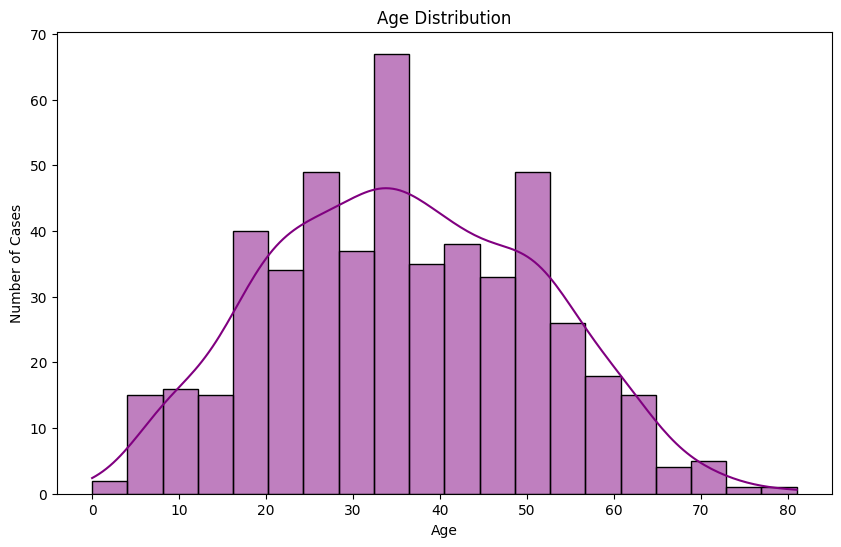

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.show()

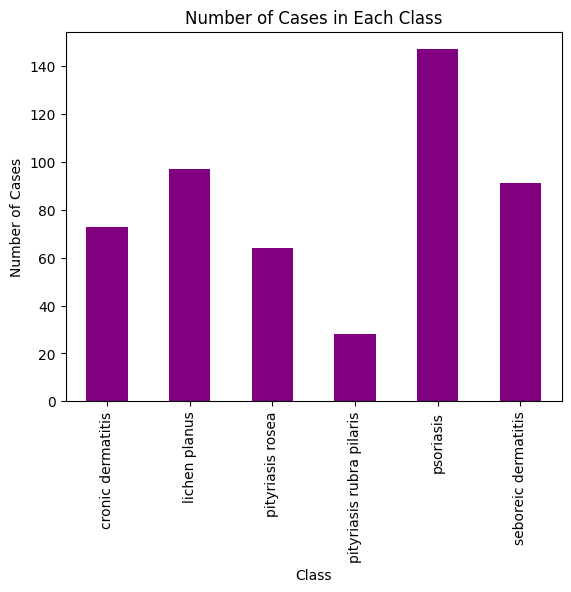

In [8]:
class_counts = df['class'].value_counts().sort_index()
class_counts.plot(kind='bar', color='purple')
plt.title('Number of Cases in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Cases')
plt.show()

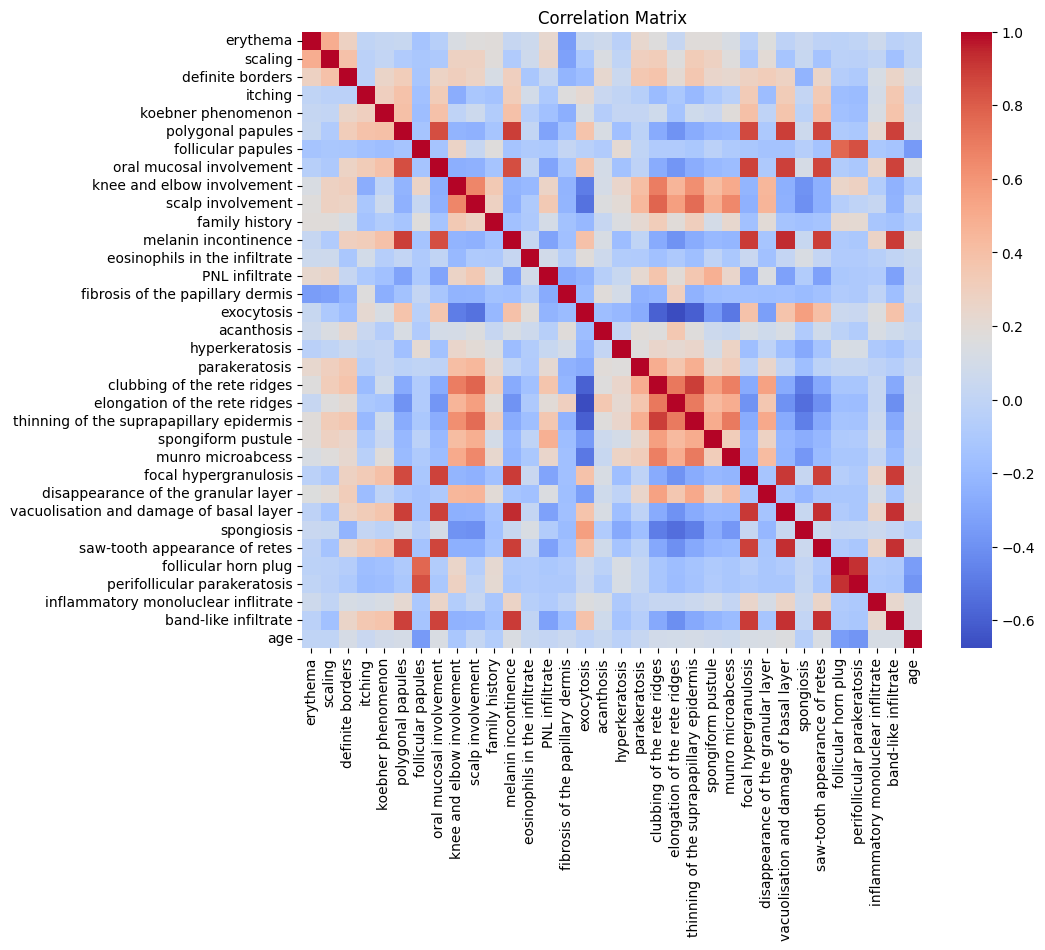

In [9]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
class NaiveBayes_Classifier:
    def __init__(self):
        self.priors = {}
        self.cond_probs = defaultdict(dict)
        self.classes = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        
        for c in self.classes:
            X_c = X[y == c]
            self.priors[c] = len(X_c) / n_samples
            self.cond_probs[c] = {}
            
            for j in range(n_features):
                feature_values = X_c[:, j]
                mean = feature_values.mean()
                var = feature_values.var()
                self.cond_probs[c][j] = (mean, var)
    
    def gaussian_likelihood(self, mean, var, x):
        eps = 1e-9
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(- (x - mean) ** 2 / (2 * var + eps))
        return coeff * exponent
    
    def calculate_posterior(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            conditional = 0
            for j in range(len(x)):
                likelihood = self.gaussian_likelihood(self.cond_probs[c][j][0], self.cond_probs[c][j][1], x[j])
                if likelihood == 0:
                    conditional += np.log(1e-9)
                else:
                    conditional += np.log(likelihood)
            posterior = prior + conditional
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]
    
    def predict(self, X):
        y_pred = [self.calculate_posterior(x) for x in X]
        return np.array(y_pred)
    
    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

    def visualize(self, y_true, y_pred, target):
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15, 6))
        
        sns.countplot(y=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(y=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        
        fig.suptitle('Native Bayes self-made', fontsize=20)
        
        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()

In [11]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.value = value

class DecisionTree_Classifier():
    def __init__(self, min_samples_split=3, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = np.shape(X)

        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split and best_split["info_gain"] > 0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth + 1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth + 1)
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
              
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_info_gain = -float("inf")
        
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    if curr_info_gain > max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="gini"):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode == "gini":
            gain = self.gini_index(parent) - (weight_l * self.gini_index(l_child) + weight_r * self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l * self.entropy(l_child) + weight_r * self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls ** 2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def fit(self, X, Y):
        if not isinstance(Y, np.ndarray):
            Y = np.array(Y)
        Y = Y.reshape(-1, 1)
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions
    
    def make_prediction(self, x, tree):
        if tree.value is not None:
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
            
    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)
    
    def visualize(self, y_true, y_pred, target):
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15, 6))
        
        sns.countplot(y=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(y=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        
        fig.suptitle('Decision Tree self-made', fontsize=20)
        
        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()

In [12]:
df_numeric = df.select_dtypes(include=[np.number])
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)
x = df_scaled
y = df['class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [13]:
# Gaussian Naive Bayes from library

GNB = GaussianNB()
GNB.fit(xtrain, ytrain).predict(xtest)
GNB_lib_score = GNB.score(xtest, ytest)
print(f"GNB accuracy from library: {GNB_lib_score * 100}%")

GNB accuracy from library: 86.0%


In [14]:
# Decision Tree from library

DT = DecisionTreeClassifier()
DT.fit(xtrain, ytrain).predict(xtest)
DT_lib_score = DT.score(xtest, ytest)
print(f"DT accuracy from library: {DT_lib_score * 100}%")

DT accuracy from library: 98.0%


In [15]:
# Gaussian Naive Bayes self-made

nb = NaiveBayes_Classifier()
nb.fit(xtrain, ytrain)
predictions = nb.predict(xtest)
nb_self_score = nb.accuracy(ytest, predictions)
print(f"GNB accuracy self-made: {nb_self_score * 100}%")

GNB accuracy self-made: 81.0%


In [16]:
# Decision Tree self-made

dt = DecisionTree_Classifier(min_samples_split=3, max_depth=4)
dt.fit(xtrain, ytrain)
predictions = dt.predict(xtest)
dt_self_score = dt.accuracy(ytest, predictions)
print(f"DT accuracy: {dt_self_score * 100}%")

DT accuracy: 96.0%


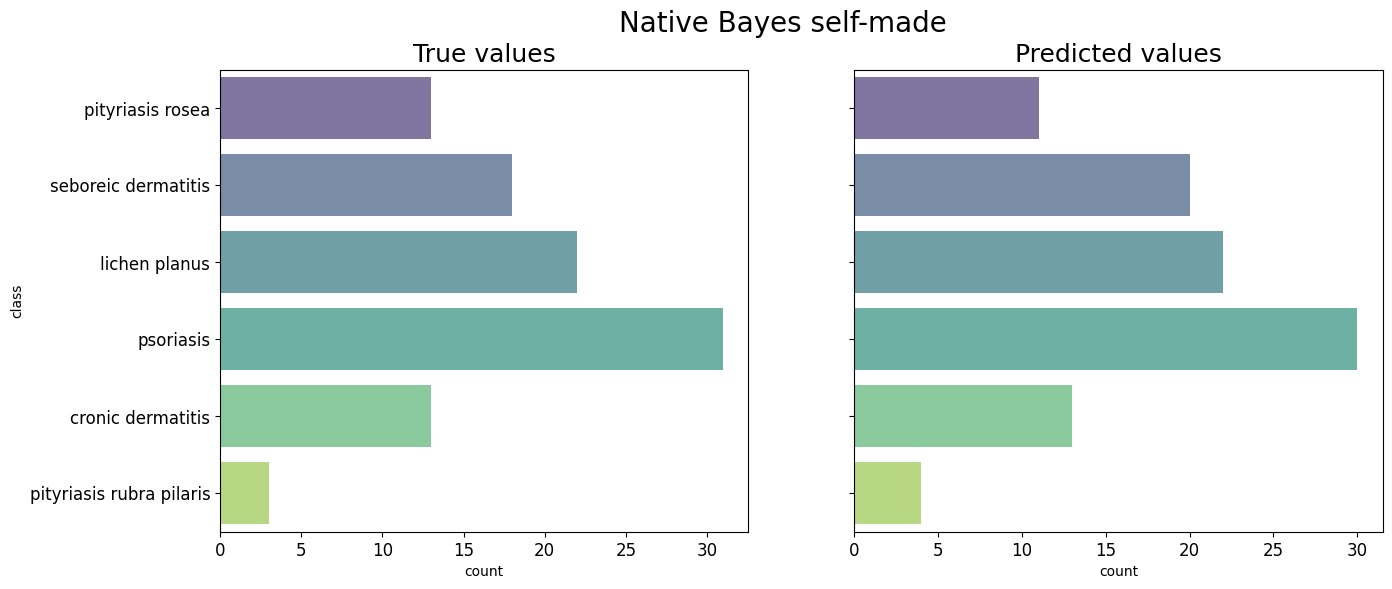

In [17]:
nb.visualize(ytest.values, predictions, target='class')

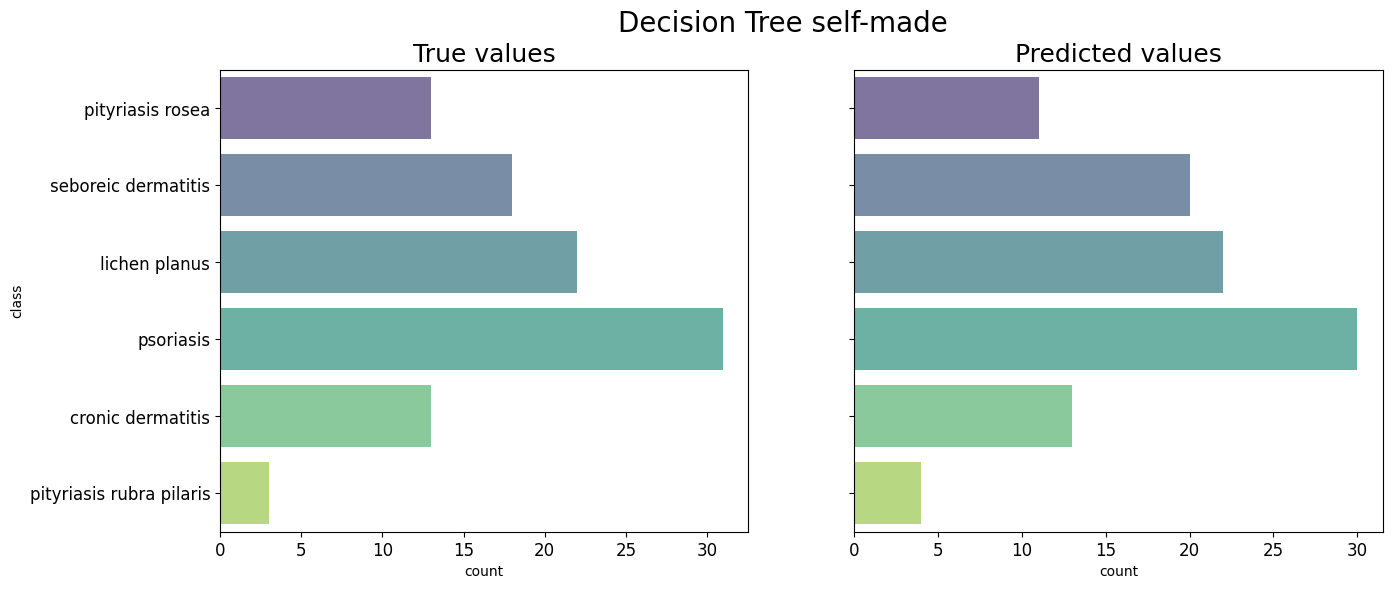

In [18]:
dt.visualize(ytest.values, predictions, target='class')

In [19]:
def train_and_evaluate_model(model, xtrain, xtest, ytrain, ytest):
    model.fit(xtrain, ytrain)
    predictions = model.predict(xtest)
    report = classification_report(ytest, predictions, output_dict=True, zero_division=0)
    accuracy = accuracy_score(ytest, predictions)
    cm = confusion_matrix(ytest, predictions)
    return report, accuracy, cm

def run_experiments(x, y, n_iterations=10):
    results_GNB_lib = []
    results_DT_lib = []
    results_gnb_self = []
    results_dt_self = []
    
    for _ in range(n_iterations):
        xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=None)
        
        GNB_lib = GaussianNB()
        report, accuracy, cm = train_and_evaluate_model(GNB_lib, xtrain, xtest, ytrain, ytest)
        results_GNB_lib.append((report, accuracy, cm))
        
        DT_lib = DecisionTreeClassifier()
        report, accuracy, cm = train_and_evaluate_model(DT_lib, xtrain, xtest, ytrain, ytest)
        results_DT_lib.append((report, accuracy, cm))
        
        gnb_self = NaiveBayes_Classifier()
        report, accuracy, cm = train_and_evaluate_model(gnb_self, xtrain, xtest, ytrain, ytest)
        results_gnb_self.append((report, accuracy, cm))
        
        dt_self = DecisionTree_Classifier(min_samples_split=3, max_depth=4)
        report, accuracy, cm = train_and_evaluate_model(dt_self, xtrain, xtest, ytrain, ytest)
        results_dt_self.append((report, accuracy, cm))
    
    return results_GNB_lib, results_DT_lib, results_gnb_self, results_dt_self

def average_metrics(results):
    class_metrics = {}
    accuracy = []
    confusion_matrices = []

    for report, acc, cm in results:
        for cls, metrics in report.items():
            if cls not in class_metrics:
                class_metrics[cls] = {'precision': [], 'recall': [], 'f1-score': [], 'support': []}
            
            if cls == 'accuracy':
                continue 
            
            class_metrics[cls]['precision'].append(metrics['precision'])
            class_metrics[cls]['recall'].append(metrics['recall'])
            class_metrics[cls]['f1-score'].append(metrics['f1-score'])
            class_metrics[cls]['support'].append(metrics['support'])
        accuracy.append(acc)
        confusion_matrices.append(cm)

    final_avg_metrics = {}
    for cls, metrics in class_metrics.items():
        final_avg_metrics[cls] = {
            'precision': np.mean(metrics['precision']),
            'recall': np.mean(metrics['recall']),
            'f1-score': np.mean(metrics['f1-score']),
            'support': np.sum(metrics['support'])
        }

    avg_accuracy = np.mean(accuracy)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

    return final_avg_metrics, avg_accuracy, avg_confusion_matrix

df_numeric = df.select_dtypes(include=[np.number])
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)
x = df_scaled
y = df['class']

results_GNB_lib, results_DT_lib, results_gnb_self, results_dt_self = run_experiments(x, y, n_iterations=100)

avg_metrics_GNB_lib, avg_accuracy_GNB_lib, avg_confusion_matrix_GNB_lib = average_metrics(results_GNB_lib)
avg_metrics_DT_lib, avg_accuracy_DT_lib, avg_confusion_matrix_DT_lib = average_metrics(results_DT_lib)
avg_metrics_gnb_self, avg_accuracy_gnb_self, avg_confusion_matrix_gnb_self = average_metrics(results_gnb_self)
avg_metrics_dt_self, avg_accuracy_dt_self, avg_confusion_matrix_dt_self = average_metrics(results_dt_self)

def create_metrics_df(avg_metrics, avg_accuracy, model_name):
    classes = [cls for cls in avg_metrics.keys() if cls != 'accuracy']
    
    data = {
        'Class': classes + ['accuracy'],
        'Precision': [avg_metrics[cls]['precision'] for cls in classes] + [None],
        'Recall': [avg_metrics[cls]['recall'] for cls in classes] + [None],
        'F1-Score': [avg_metrics[cls]['f1-score'] for cls in classes] + [None],
        'Support': [avg_metrics[cls]['support'] for cls in classes] + [None],
        'Accuracy': [None] * len(classes) + [avg_accuracy]
    }
    
    df = pd.DataFrame(data)
    df['Model'] = model_name
    return df

df_GNB_lib = create_metrics_df(avg_metrics_GNB_lib, avg_accuracy_GNB_lib, 'GNB Library')
df_DT_lib = create_metrics_df(avg_metrics_DT_lib, avg_accuracy_DT_lib, 'DT Library')
df_gnb_self = create_metrics_df(avg_metrics_gnb_self, avg_accuracy_gnb_self, 'GNB Self-made')
df_dt_self = create_metrics_df(avg_metrics_dt_self, avg_accuracy_dt_self, 'DT Self-made')

df_results = pd.concat([df_GNB_lib, df_DT_lib, df_gnb_self, df_dt_self], ignore_index=True)
df_results

c:\Users\marta\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\marta\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Class,Precision,Recall,F1-Score,Support,Accuracy,Model
0,cronic dermatitis,0.906937,0.991884,0.946289,1423.0,NaN,GNB Library
1,lichen planus,0.989521,1.000000,0.994613,1935.0,NaN,GNB Library
2,pityriasis rosea,0.540384,0.975594,0.688986,1308.0,NaN,GNB Library
3,pityriasis rubra pilaris,0.905123,0.975119,0.934027,581.0,NaN,GNB Library
4,psoriasis,0.994459,1.000000,0.997129,2964.0,NaN,GNB Library
5,seboreic dermatitis,0.918962,0.257990,0.391918,1789.0,NaN,GNB Library
6,macro avg,0.875898,0.866764,0.825494,10000.0,NaN,GNB Library
7,weighted avg,0.906817,0.861600,0.840103,10000.0,NaN,GNB Library
8,accuracy,NaN,NaN,NaN,NaN,0.8616,GNB Library
9,cronic dermatitis,0.987430,0.987198,0.986553,1423.0,NaN,DT Library


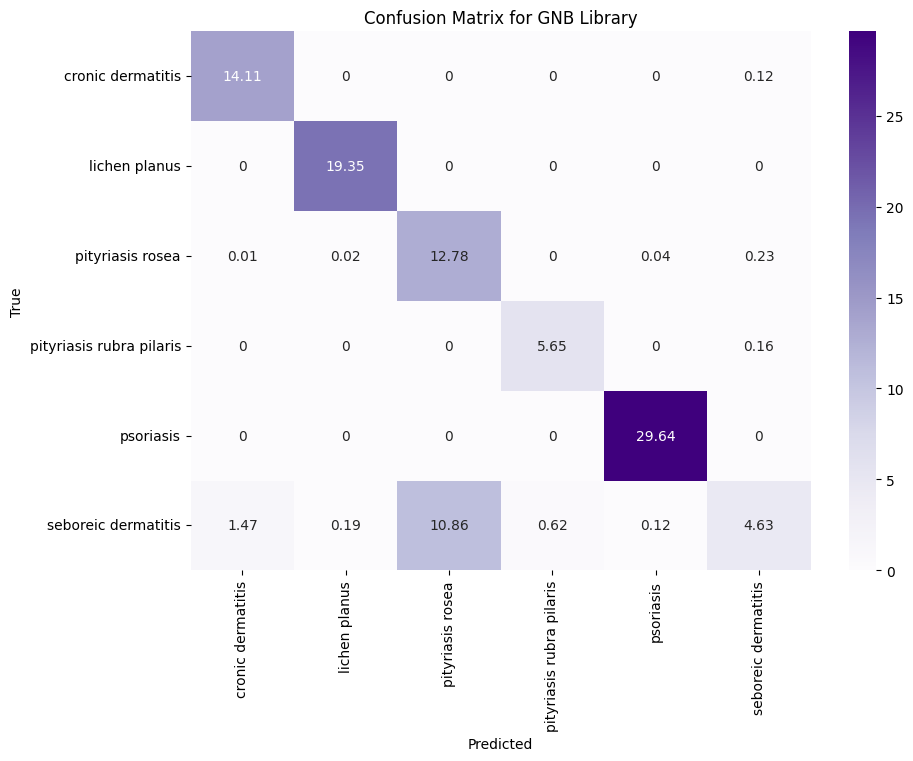

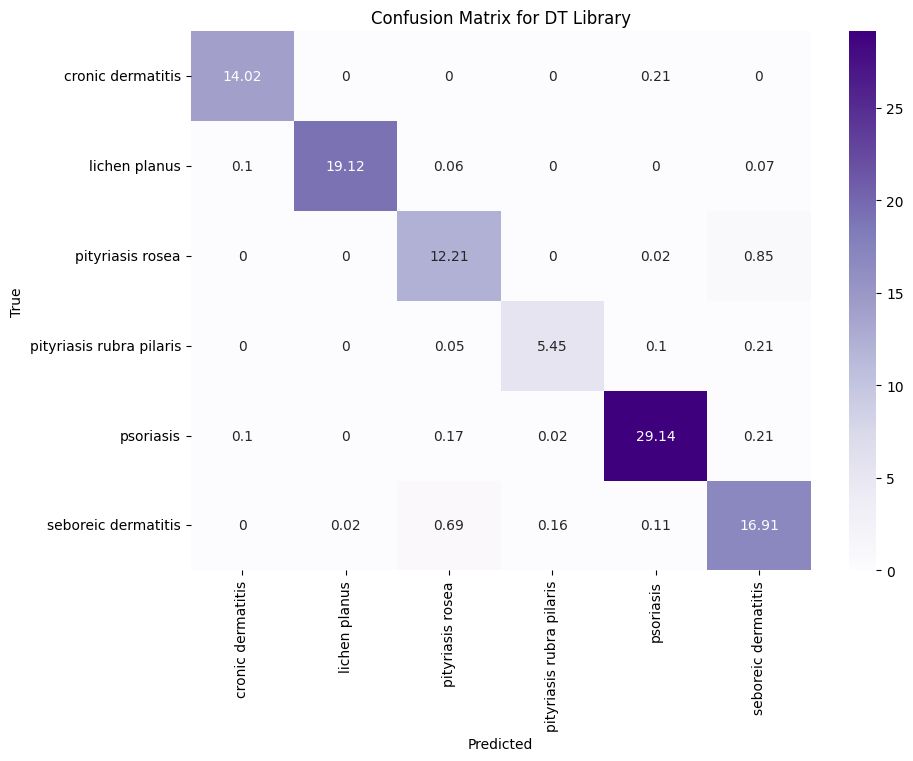

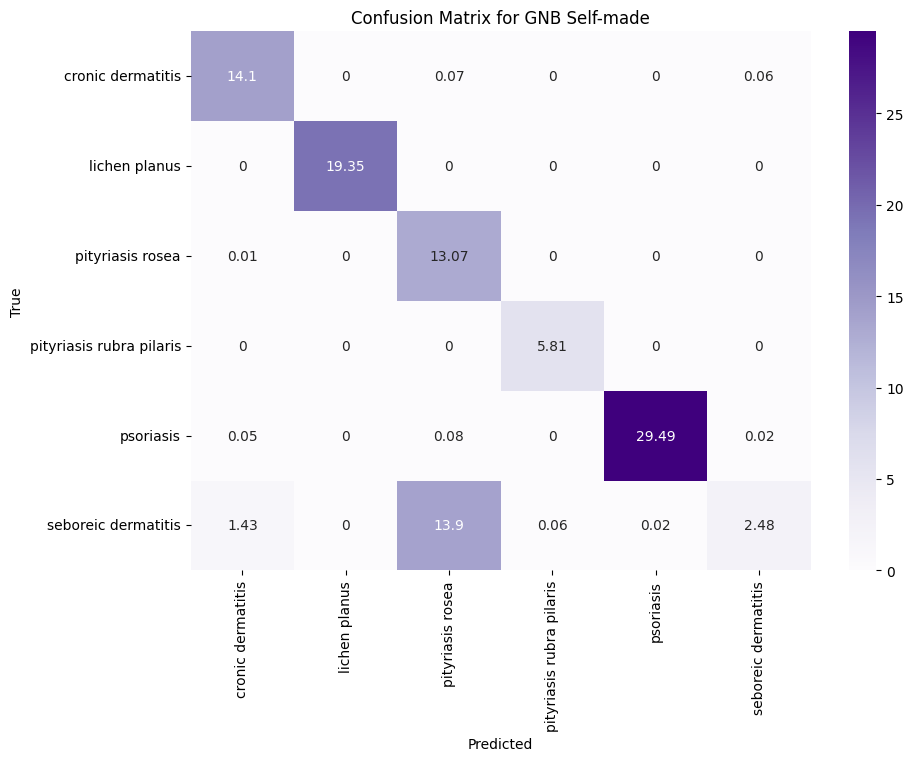

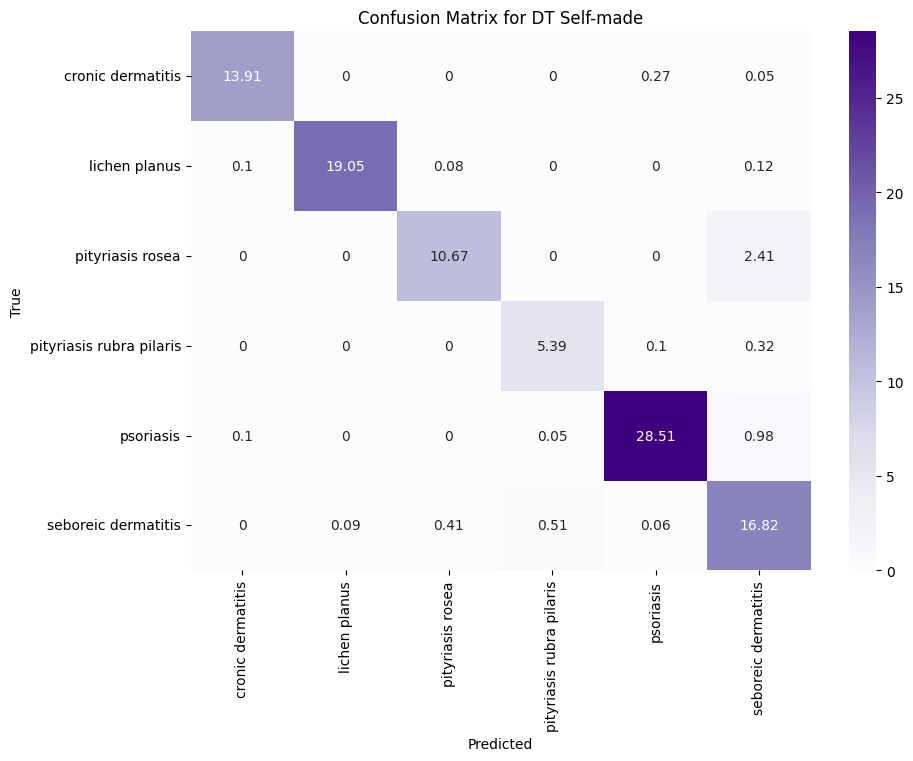

In [35]:
class_names = ['cronic dermatitis', # przewlekłe zapalenie skóry
                'lichen planus', # liszaj płaski
                'pityriasis rosea', # łupież różowy
                'pityriasis rubra pilaris', # łupież czerwono mieszkowy
                'psoriasis', # łuszczyca
                'seboreic dermatitis' # łojotokowe zapalenie skóry
                ]

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(avg_confusion_matrix_GNB_lib, 'GNB Library')
plot_confusion_matrix(avg_confusion_matrix_DT_lib, 'DT Library')
plot_confusion_matrix(avg_confusion_matrix_gnb_self, 'GNB Self-made')
plot_confusion_matrix(avg_confusion_matrix_dt_self, 'DT Self-made')

In [28]:
results_lib = {'Gaussian Naive Bayes lib': avg_accuracy_GNB_lib * 100, 'Decision Tree lib': avg_accuracy_DT_lib * 100}
methods_lib = list(results_lib.keys())
accuracy_lib = list(results_lib.values())

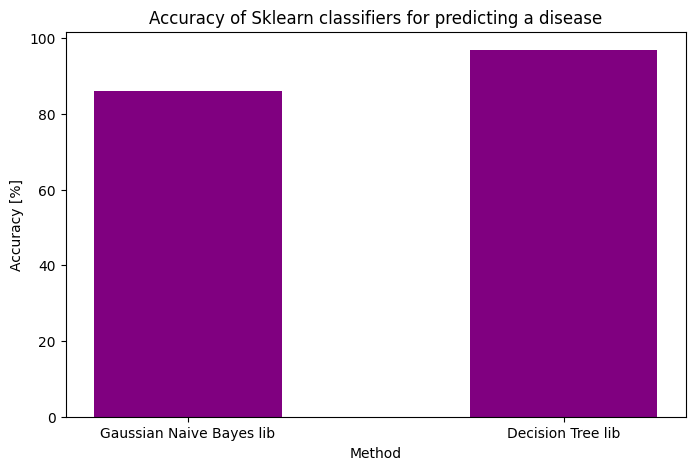

In [29]:
fig = plt.figure(figsize = (8, 5))
plt.bar(methods_lib, accuracy_lib, color = 'purple', width=0.5)
plt.xlabel('Method')
plt.ylabel('Accuracy [%]')
plt.title('Accuracy of Sklearn classifiers for predicting a disease')
plt.show()

In [30]:
results_self = {'Gaussian Naive Bayes': avg_accuracy_gnb_self * 100, 'Decision Tree': avg_accuracy_dt_self * 100}
methods_self = list(results_self.keys())
accuracy_self = list(results_self.values())

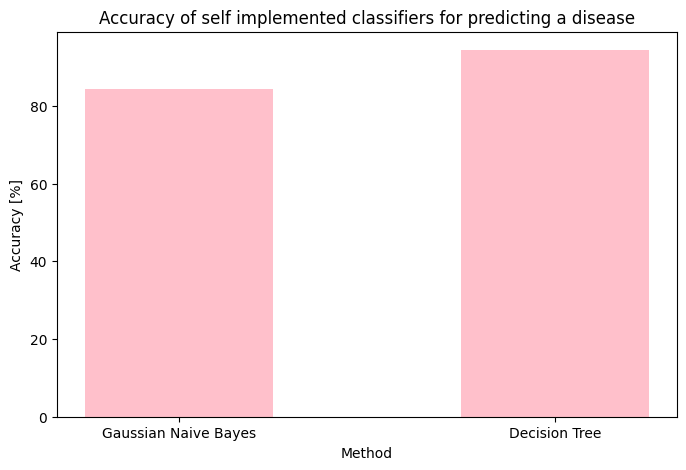

In [31]:
fig2 = plt.figure(figsize = (8, 5))
plt.bar(methods_self, accuracy_self, color = 'pink', width=0.5)
plt.xlabel('Method')
plt.ylabel('Accuracy [%]')
plt.title('Accuracy of self implemented classifiers for predicting a disease')
plt.show()

In [32]:
results = {**results_lib, **results_self}
results = collections.OrderedDict(sorted(results.items()))
methods = list(results.keys())
accuracy = list(results.values())

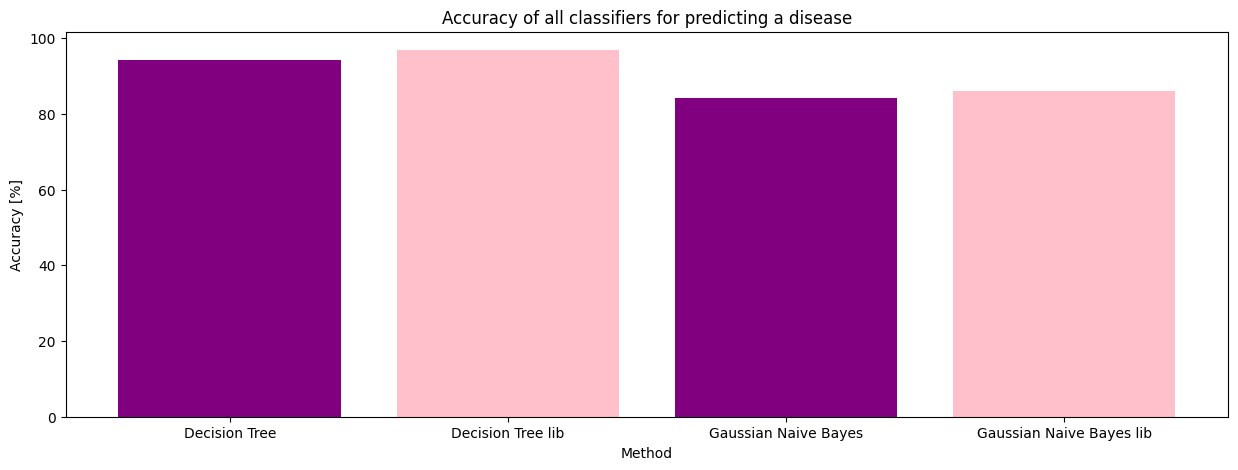

In [33]:
fig3 = plt.figure(figsize = (15, 5))
bar = plt.bar(methods, accuracy, color = ['purple', 'pink'])
plt.xlabel('Method')
plt.ylabel('Accuracy [%]')
plt.title('Accuracy of all classifiers for predicting a disease')
plt.show()